In [2]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'vegetable-image-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1817999%2F2965251%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240204%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240204T051249Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D1bef5a900d572c1d2024c344af4b0979b8e747985146d4963470302e8480e477ac9eaf3d3c12129eabaf285ac0fba30d5e569f3c8a01fbb4e9a9d34e7eac1fa9e2593acb7454d97b86f363c4a60c4f0277ca53488499226331bde7b23965f0e34df87dcb92943e646634db684c864cc66cc919a694135fe4484672d5bd48740a890419ac72e648b748b5ac6c28ee0b95d452c7f63baf4fa5dfa8193cebfe12c45a0daf34d7e1e8102c56c2b991aac57d2ae75ea329181e220d1fb9a7e9a51c4f6b84b19c08ce746d17142991f0f1c8ecad1493ff73ab43c013801cf48397715324ab49281a162846f34690bf32ae32b3247f1e6cccc49c2c8c6788ac4a8a766a,inception:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4395801%2F7547702%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240204%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240204T051249Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4e239292c64cfa65e51cbb9d433701851eb3e55d68d047aebc075d30e5bc0fbac8f27a107b6e5d3404ea84125b3eb6382d162accd2ee4e4c837c129490a71874f16368f9fddea28406d539717fc06ce8922ad5b30d06c0527543abdb403f88de9eb5479adf9ba13c4e25d3f9217542e367ebac8a352372519f568642eb50c0c821183cfaa3796349b78e41e8a55c83a435833f4c51a26744f8c5eed297d7b09579c787a5186ea8cf2d0dc573aff99cb934bfcf1f198c51d0fabe40eee66fbb2a52892b38aedc0ea332c2e0caaf9edcfbfd0620f234797470e0b18c58b0c6eaa7e1982307c9b933abf9470075ac3ccbf624baeb4f05393e0839d018ce9aa48cd2'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 560031432 bytes downloaded
Downloaded and uncompressed: vegetable-image-dataset
[==================================================] 81047425 bytes downloaded
Downloaded and uncompressed: inception
Data source import complete.


In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from PIL import ImageEnhance
from skimage.io import imread
import matplotlib.pyplot as plt

import os, random, pathlib, warnings, itertools, math
warnings.filterwarnings("ignore")

import tensorflow as tf
import tensorflow.keras.backend as K
from sklearn.metrics import confusion_matrix

from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dense, Dropout

K.clear_session()

In [4]:
dataset='../input/vegetable-image-dataset/Vegetable Images'

train_folder = os.path.join(dataset,"train")
test_folder = os.path.join(dataset,"validation")
validation_folder = os.path.join(dataset,"test")

In [5]:
def count_files(rootdir):
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            files_count = sum(1 for _ in path.iterdir() if _.is_file())
            print(f'There are {files_count} files in {path.name}')

test_folder = "/kaggle/input/vegetable-image-dataset/Vegetable Images/test"
count_files(test_folder)

There are 200 files in Capsicum
There are 200 files in Broccoli
There are 200 files in Tomato
There are 200 files in Brinjal
There are 200 files in Cauliflower
There are 200 files in Cucumber
There are 200 files in Bitter_Gourd
There are 200 files in Potato
There are 200 files in Pumpkin
There are 200 files in Cabbage
There are 200 files in Bottle_Gourd
There are 200 files in Bean
There are 200 files in Radish
There are 200 files in Papaya
There are 200 files in Carrot


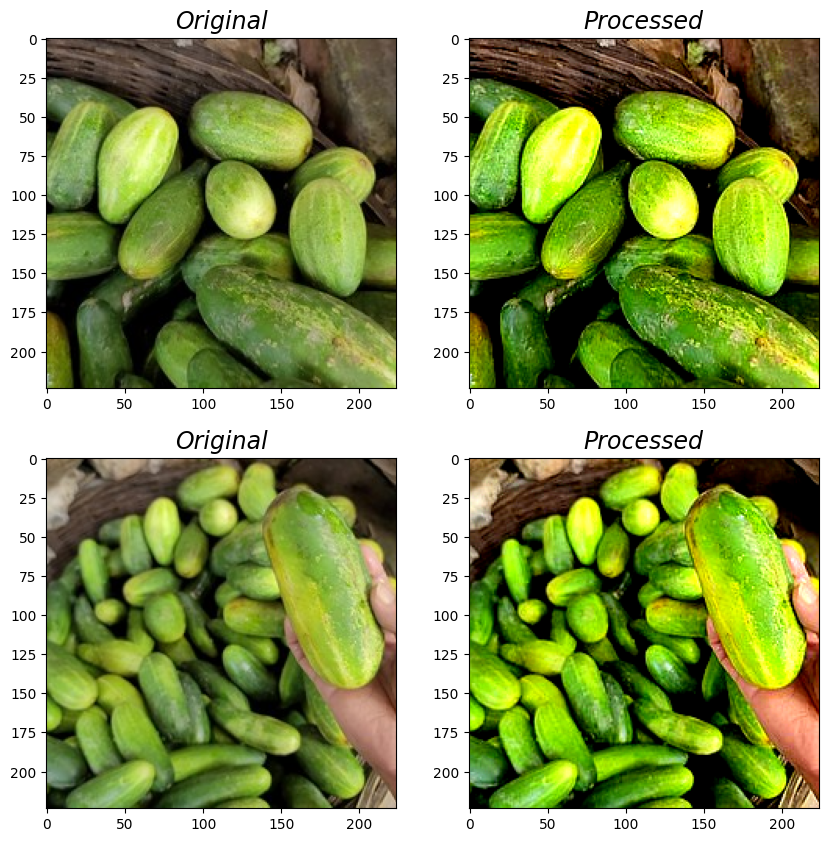

In [6]:

image_folder = "Cucumber"  # The vegetable you want to display
number_of_images = 2       # Number of images to display
test_folder = "/kaggle/input/vegetable-image-dataset/Vegetable Images/test"  # Path to the test folder

def preprocess_image(image):
    image = ImageEnhance.Color(image).enhance(1.35)
    image = ImageEnhance.Contrast(image).enhance(1.45)
    image = ImageEnhance.Sharpness(image).enhance(2.5)
    return image

def display_images(images):
    plt.figure(figsize=(10, 10))
    for i, (title, img) in enumerate(images, start=1):
        plt.subplot(number_of_images, 2, i)
        plt.title(label=title, size=17, pad='7.0', loc="center", fontstyle='italic')
        plt.imshow(img)

def preprocess_and_display(folder, number_of_images):
    for _ in range(number_of_images):
        file_name = random.choice(os.listdir(folder))
        image_path = os.path.join(folder, file_name)

        original_image = Image.open(image_path)
        processed_image = preprocess_image(original_image)

        yield 'Original', original_image
        yield 'Processed', processed_image

# Run the function with the provided parameters
images_to_display = list(preprocess_and_display(os.path.join(test_folder, image_folder), number_of_images))
display_images(images_to_display)
plt.show()

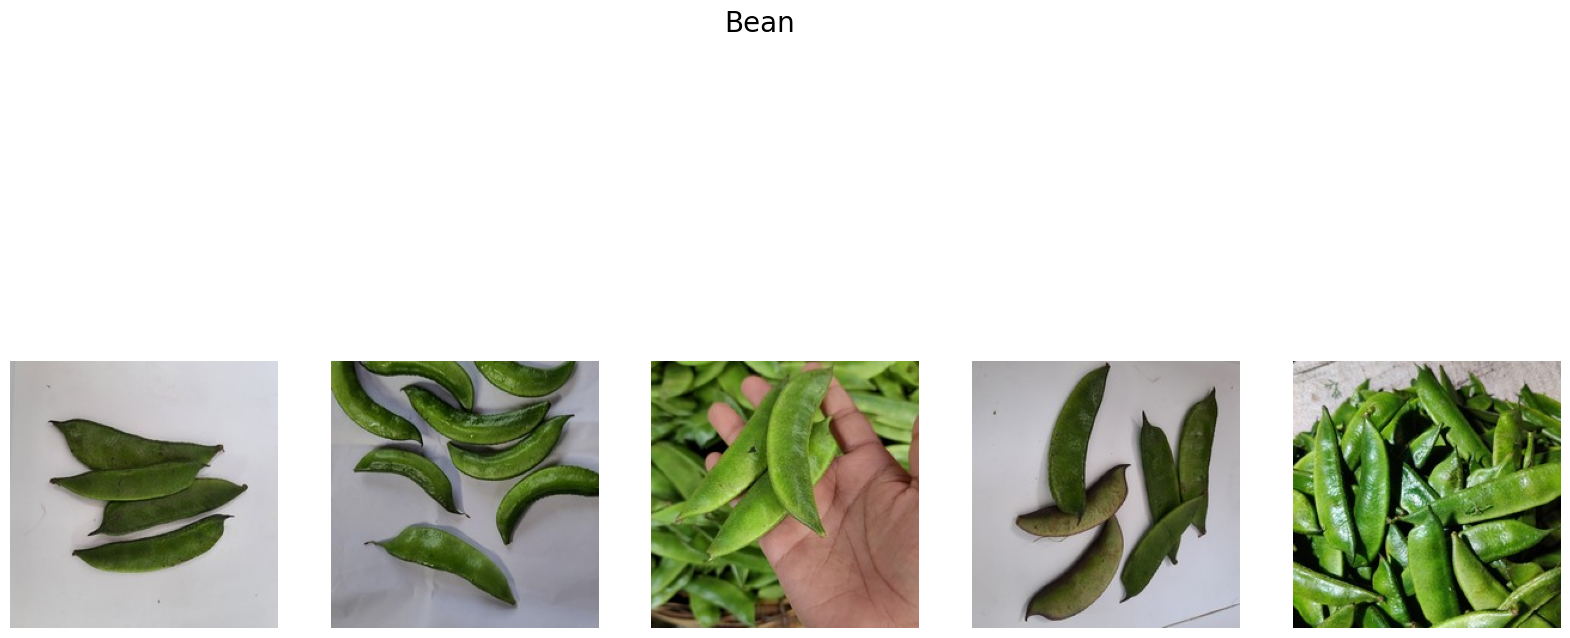

In [7]:
select_vegetable = "Bean"
rows, columns = 1, 5

display_folder = os.path.join(train_folder, select_vegetable)
total_images = rows * columns

fig, axes = plt.subplots(rows, columns, figsize=(20, 10))
fig.suptitle(select_vegetable, fontsize=20)

for ax, image_name in zip(axes.flatten(), os.listdir(display_folder)[:total_images]):
    image_path = os.path.join(display_folder, image_name)
    img = plt.imread(image_path)
    ax.imshow(img)
    ax.axis("off")

plt.show()

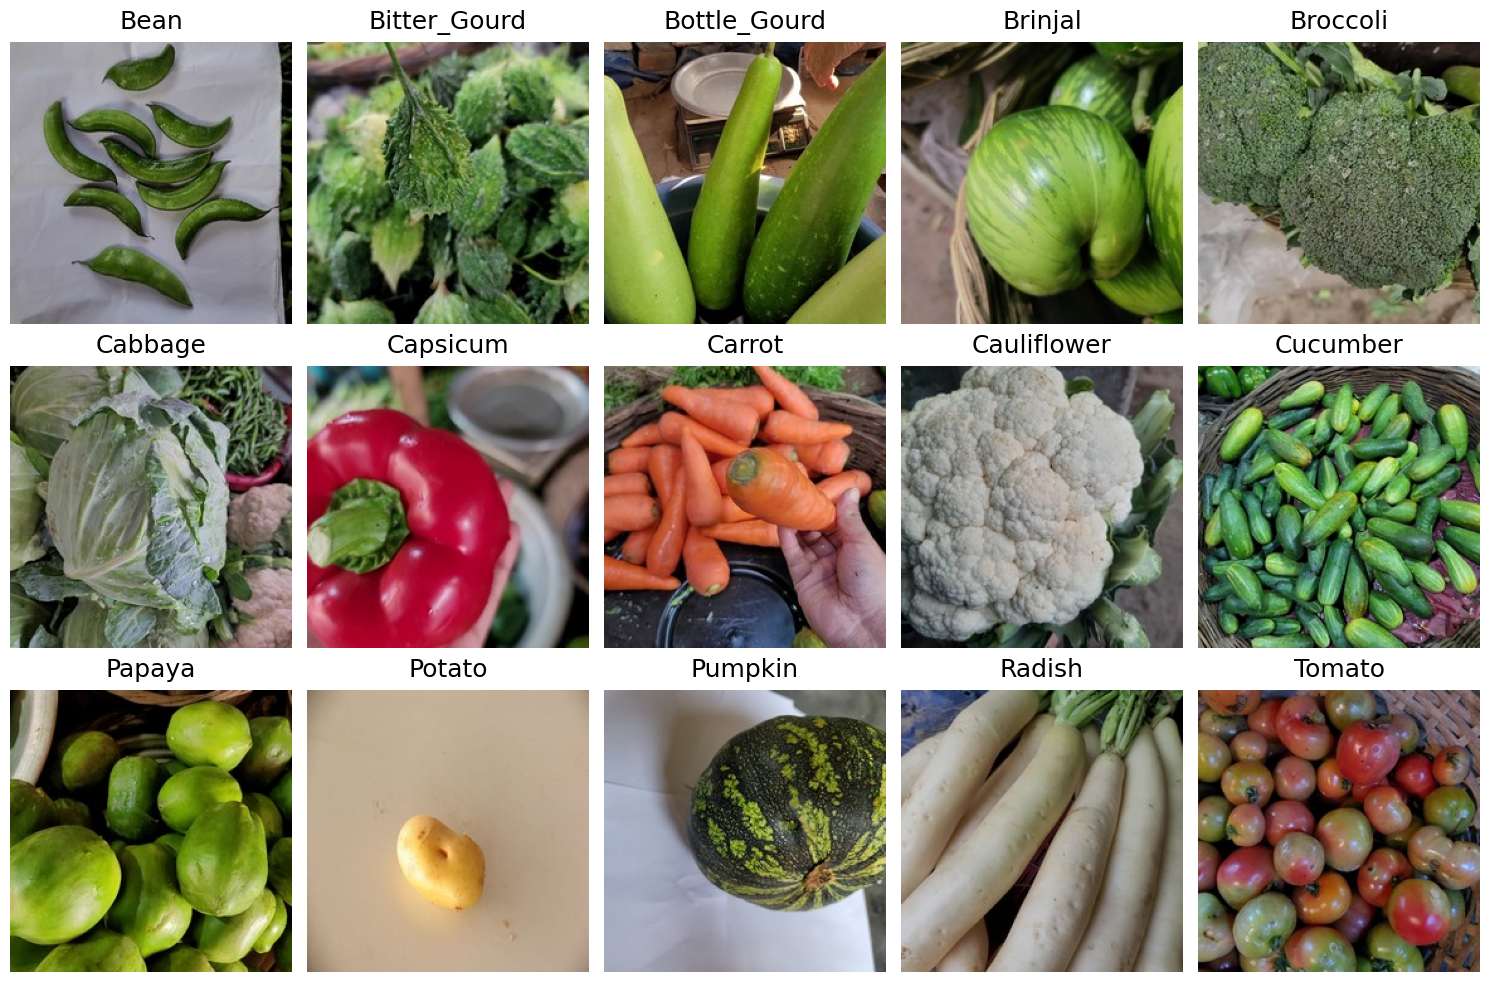

In [8]:
images = []

for food_folder in sorted(os.listdir(train_folder)):
    food_items = os.listdir(os.path.join(train_folder, food_folder))
    food_selected = np.random.choice(food_items)
    images.append(os.path.join(train_folder, food_folder, food_selected))

fig, axes = plt.subplots(3, 5, figsize=(15, 10))

for ax, image_path in zip(axes.flatten(), images):
    category = image_path.split('/')[-2]
    img = plt.imread(image_path)
    ax.imshow(img)
    ax.set_title(category, pad=10, size=18)
    ax.axis("off")

plt.tight_layout()
plt.show()

In [9]:
IMAGE_SIZE = [224, 224]

WEIGHTS_PATH = "/kaggle/input/inception/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights=WEIGHTS_PATH, include_top=False)

for layer in inception.layers:
    layer.trainable = False

x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

prediction = Dense(15, activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
train_datagen = image.ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True)

test_datagen = image.ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(
    train_folder,
    target_size = (224, 224),
    batch_size = 64,
    class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(
    test_folder,
    target_size = (224, 224),
    batch_size = 64,
    class_mode = 'categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [11]:
class_map = training_set.class_indices
class_map

{'Bean': 0,
 'Bitter_Gourd': 1,
 'Bottle_Gourd': 2,
 'Brinjal': 3,
 'Broccoli': 4,
 'Cabbage': 5,
 'Capsicum': 6,
 'Carrot': 7,
 'Cauliflower': 8,
 'Cucumber': 9,
 'Papaya': 10,
 'Potato': 11,
 'Pumpkin': 12,
 'Radish': 13,
 'Tomato': 14}

In [12]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
235/235 [==============================] - 2293s 10s/step - loss: 0.2713 - accuracy: 0.9192 - val_loss: 0.0600 - val_accuracy: 0.9823
Epoch 2/5
235/235 [==============================] - 2280s 10s/step - loss: 0.0703 - accuracy: 0.9770 - val_loss: 0.0353 - val_accuracy: 0.9913
Epoch 3/5
235/235 [==============================] - 2264s 10s/step - loss: 0.0470 - accuracy: 0.9852 - val_loss: 0.0318 - val_accuracy: 0.9920
Epoch 4/5
235/235 [==============================] - 2259s 10s/step - loss: 0.0398 - accuracy: 0.9879 - val_loss: 0.0248 - val_accuracy: 0.9947
Epoch 5/5
235/235 [==============================] - 2264s 10s/step - loss: 0.0286 - accuracy: 0.9909 - val_loss: 0.0177 - val_accuracy: 0.9957


In [13]:
model.save('model_inceptionV3_epoch5.h5')

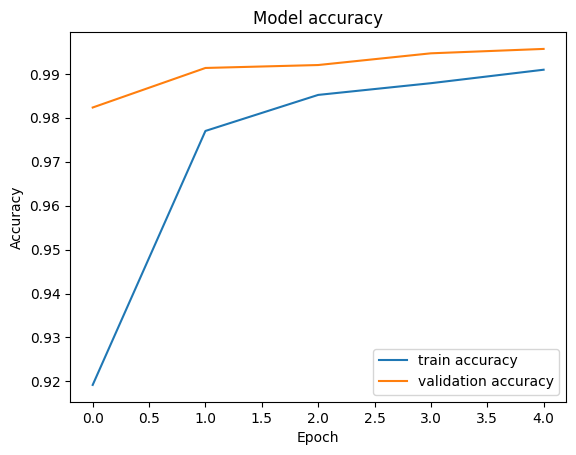

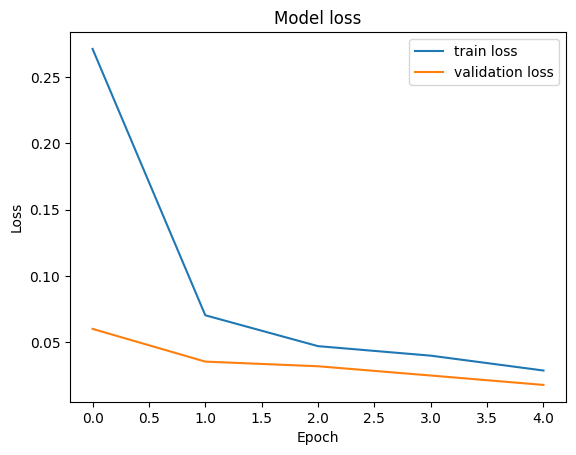

In [14]:
def plot_accuracy(history):

    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_InceptionV3')
    plt.show()

def plot_loss(history):

    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_InceptionV3')
    plt.show()

plot_accuracy(r)
plot_loss(r)

In [15]:
print("Total layers in the model : ",len(model.layers),"\n")

layers = [layer.output for layer in model.layers[0:]]
layer_names = []
for layer in model.layers[0:]:
    layer_names.append(layer.name)

print("First layer : ", layer_names[0])
print("InceptionV3 layers : Layer 2 to Layer 311")
print("Our fine tuned layers : ", layer_names[311:314])
print("Final Layer : ", layer_names[314])

Total layers in the model :  315 

First layer :  input_1
InceptionV3 layers : Layer 2 to Layer 311
Our fine tuned layers :  ['global_average_pooling2d', 'dense', 'dropout']
Final Layer :  dense_1


In [16]:
K.clear_session()
path_to_model='./model_inceptionV3_epoch5.h5'
print("Loading the model..")
model = load_model(path_to_model)
print("Done!")

Loading the model..
Done!


In [17]:
validation_data_dir = '/kaggle/input/vegetable-image-dataset/Vegetable Images/validation'

validation_datagen = image.ImageDataGenerator(rescale=1. / 255)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical')

scores = model.evaluate_generator(validation_generator)
print("Test Accuracy: {:.3f}".format(scores[1]))

Found 3000 images belonging to 15 classes.


KeyboardInterrupt: 

In [18]:
category={
    0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3 : 'Brinjal', 4: "Broccoli", 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower',
    9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13 : "Radish", 14: "Tomato"
}

def predict_image(filename,model):
    img_ = image.load_img(filename, target_size=(224, 224))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.

    prediction = model.predict(img_processed)
    index = np.argmax(prediction)

    plt.title("Prediction - {}".format(category[index]))
    plt.imshow(img_array)

def predict_dir(filedir,model):
    cols=3
    pos=0
    images=[]
    total_images=len(os.listdir(filedir))
    rows=total_images//cols + 1

    true=filedir.split('/')[-1]

    for i in sorted(os.listdir(filedir)):
        images.append(os.path.join(filedir,i))

    for subplot, imggg in enumerate(images):
        img_ = image.load_img(imggg, target_size=(224, 224))
        img_array = image.img_to_array(img_)
        img_processed = np.expand_dims(img_array, axis=0)
        img_processed /= 255.
        prediction = model.predict(img_processed)
        index = np.argmax(prediction)

        pred=category.get(index)
        if pred==true:
            pos+=1

    acc=pos/total_images
    print("Accuracy for {orignal}: {:.2f} ({pos}/{total})".format(acc,pos=pos,total=total_images,orignal=true))

In [19]:
import requests

# Replace with your actual Edamam API key
EDAMAM_API_KEY = "b6188ea7e2084e3181f453dc9851a0d6"

def get_recipe_suggestions(ingredient):
    base_url = "https://api.edamam.com/api/recipes/v2"
    params = {
        "apiKey": EDAMAM_API_KEY,
        "ingredients": ingredient,
        "number": 3  # Number of recipe suggestions
    }

    response = requests.get(base_url, params=params)

    if response.status_code == 200:
        recipes = response.json()
        return recipes
    else:
        print("Error accessing the recipe API.")
        return None

1/1 [==============================] - 4s 4s/step


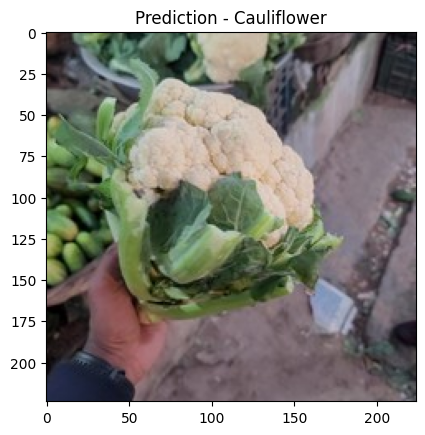

In [20]:
predict_image(os.path.join(validation_folder,'Cauliflower/1064.jpg'),model)

In [21]:
for i in os.listdir(validation_folder):
    predict_dir(os.path.join(validation_folder,i),model)

1/1 [==============================] - 0s 136ms/step
Accuracy for Capsicum: 1.00 (200/200)
1/1 [==============================] - 0s 134ms/step
Accuracy for Broccoli: 1.00 (200/200)
1/1 [==============================] - 0s 136ms/step
Accuracy for Tomato: 0.99 (199/200)
1/1 [==============================] - 0s 241ms/step
Accuracy for Brinjal: 1.00 (200/200)
1/1 [==============================] - 0s 155ms/step
Accuracy for Cauliflower: 0.98 (196/200)
1/1 [==============================] - 0s 141ms/step
Accuracy for Cucumber: 0.99 (199/200)
1/1 [==============================] - 0s 138ms/step
Accuracy for Bitter_Gourd: 0.97 (195/200)
1/1 [==============================] - 0s 265ms/step
Accuracy for Potato: 1.00 (200/200)
1/1 [==============================] - 0s 212ms/step
Accuracy for Pumpkin: 1.00 (200/200)
1/1 [==============================] - 0s 137ms/step
Accuracy for Cabbage: 1.00 (200/200)
1/1 [==============================] - 0s 138ms/step
Accuracy for Bottle_Gourd: 1.00 (200/

In [23]:
def labels_confusion_matrix(validation_folder):

    folder_path=validation_folder

    mapping={}
    for i,j in enumerate(sorted(os.listdir(folder_path))):
        mapping[j]=i

    files=[]
    real=[]
    predicted=[]

    for i in os.listdir(folder_path):

        true=os.path.join(folder_path,i)
        true=true.split('/')[-1]
        true=mapping[true]

        for j in os.listdir(os.path.join(folder_path,i)):

            img_ = image.load_img(os.path.join(folder_path,i,j), target_size=(224,224))
            img_array = image.img_to_array(img_)
            img_processed = np.expand_dims(img_array, axis=0)
            img_processed /= 255.
            prediction = model.predict(img_processed)
            index = np.argmax(prediction)

            predicted.append(index)
            real.append(true)

    return (real,predicted)

def print_confusion_matrix(real,predicted):
    total_output_labels = 15
    cmap="turbo"
    cm_plot_labels = [i for i in range(15)]

    cm = confusion_matrix(y_true=real, y_pred=predicted)
    df_cm = pd.DataFrame(cm,cm_plot_labels,cm_plot_labels)
    sns.set(font_scale=1.2) # for label size
    plt.figure(figsize = (15,10))
    s=sns.heatmap(df_cm,fmt="d", annot=True,cmap=cmap) # font size

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix.png')
    plt.show()

1/1 [==============================] - 0s 245ms/step


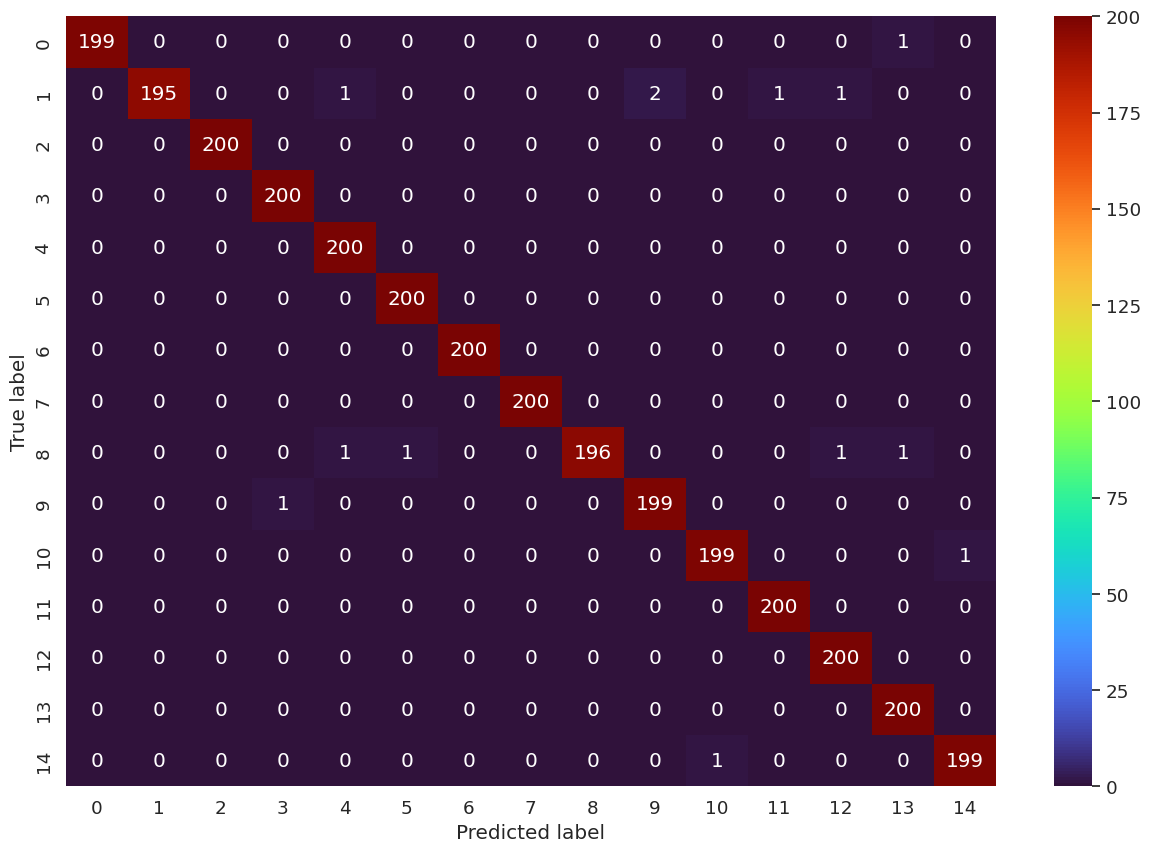

In [24]:
y_true,y_pred=labels_confusion_matrix(validation_folder)
print_confusion_matrix(y_true,y_pred)

In [25]:
def wrong_input_capture(test_category):

    a=os.path.basename(test_category)
    wrong_array=[]

    for i in os.listdir(test_category):

        imggg=os.path.join(test_category,i)

        img_ = image.load_img(imggg, target_size=(224, 224))
        img_array = image.img_to_array(img_)
        img_processed = np.expand_dims(img_array, axis=0)
        img_processed /= 255.
        prediction = model.predict(img_processed)

        index = np.argmax(prediction)
        pred=category.get(index)

        if not pred==a:
            wrong_array.append((imggg,pred))

    return wrong_array

def visualize_wrong_input(images):

    fig=plt.figure(1, figsize=(20, 25))
    total_images=len(images)
    rows=math.ceil(float(total_images/3))
    for subplot,(image_path,predicted) in enumerate(images):
        img = plt.imread(image_path)
        fig=plt.subplot(rows, 3, subplot+1)
        fig.set_title("Predicted - {}".format(predicted), pad = 10,size=18)
        plt.imshow(img)

    plt.tight_layout()

In [26]:
vegetable="Broccoli"
path=os.path.join(validation_folder,vegetable)
images= wrong_input_capture(path)
visualize_wrong_input(images)

1/1 [==============================] - 0s 235ms/step


<Figure size 2000x2500 with 0 Axes>

In [32]:
import os
import requests
import numpy as np
from tensorflow.keras.preprocessing import image

# Replace with your actual Edamam API key
EDAMAM_API_KEY = "3d12b9a9b4d1452980c9083e8605cc9d"

# Define the mapping of category indices to category names
category = {0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3 : 'Brinjal', 4: "Broccoli", 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower',
    9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13 : "Radish", 14: "Tomato"
}

def get_recipe_suggestions(ingredient):
    base_url = "https://api.spoonacular.com/recipes/findByIngredients"
    params = {
        "apiKey": EDAMAM_API_KEY,
        "ingredients": ingredient,
        "number": 3  # Number of recipe suggestions
    }

    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()  # Raise an exception for bad responses (e.g., 404 or 500)
        recipes = response.json()
        return recipes
    except requests.exceptions.RequestException as e:
        print(f"Error accessing the recipe API: {e}")
        return None

def predict_single_image_with_recipe(image_path, model):
    img_ = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.

    prediction = model.predict(img_processed)
    index = np.argmax(prediction)

    predicted_vegetable = category.get(index)

    # Get suggested recipes based on the predicted vegetable
    recipe_suggestions = get_recipe_suggestions(predicted_vegetable)

    if recipe_suggestions:
        print(f"\nSuggested recipes for {predicted_vegetable}:")
        for recipe in recipe_suggestions:
            print("- Recipe:", recipe["title"])
            print("  Ingredients:", ', '.join(recipe["usedIngredients"]))
            print("  Instructions:", recipe["instructions"])
            print("\n")

    return predicted_vegetable

# Assuming you have loaded your model before calling this function
model = load_model("/content/model_inceptionV3_epoch5.h5")

# Replace with the actual image file path
image_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Bean/0023.jpg'

# Call the function
predicted_vegetable = predict_single_image_with_recipe(image_path, model)

# If needed, you can print the predicted vegetable outside the function
print("Predicted Vegetable:", predicted_vegetable)


1/1 [==============================] - 2s 2s/step
Predicted Vegetable: Bean


In [ ]:
import cv2
import numpy as np

def count_vegetables(img):
    # Preprocessing
    blur = cv2.GaussianBlur(img, (3,3), 0)
    gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

    # Segmentation
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    kernel = np.ones((3,3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    # Find initial contours
    contours = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]

    # Filter contours by area and shape
    min_area = 50
    contours = [c for c in contours if cv2.contourArea(c) > min_area]
    contours = filter_irregular_cnts(contours)

    # Seperate clustered contours
    contours = separate_clustered_cnts(contours)

    # Draw final contours and display count
    img_with_contours = img.copy()
    cv2.drawContours(img_with_contours, contours, -1, (0,255,0), 2)
    print(f'Number of Vegetables: {len(contours)}')

    return img_with_contours

def separate_clustered_cnts(contours):
    separated = []
    for cnt in contours:
        if len(cnt) < 3:
            separated.append(cnt)
            continue

        hull = cv2.convexHull(cnt)
        cnts = [cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt,True), True) for cnt in cnts]
        defects = cv2.convexityDefects(cnt, hull)
        if defects is not None and len(defects) > 0:
            areas = [cv2.contourArea(c) for c in cnt]
            # Split clustered contour using k-means on contour point areas
            separated.extend(split_clustered(cnt, areas))
        else:
            separated.append(cnt)
    return separated

def filter_irregular_cnts(contours):
    filtered = []
    for cnt in contours:
        shape_ratio = cv2.contourArea(cnt) / cv2.arcLength(cnt, True)
        if shape_ratio > 0.5:
            filtered.append(cnt)
    return filtered

def split_clustered(cnt, areas):
    # Kmeans contour splitting logic
    return splitted_cnts


import cv2

# Load test image
img = cv2.imread('/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Bean/0023.jpg')

# Call vegetable counting function
result_img = count_vegetables(img)

# Display original test image
cv2.imshow('Original Image', img)
cv2.waitKey(0)

# Display output image with contours
cv2.imshow('Counted Vegetables', result_img)
cv2.waitKey(0)

# Print total count
print(f'Number of Vegetables: {len(cnts)}')